In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Data collection and processing**

In [2]:
#loading csv file to dataframe
df=pd.read_csv(r"C:\Users\Admin\Desktop\DS&A CEP\heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Data Analyzation**

In [7]:
#statistical measures about data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#checking distribtion of target variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
#1---> represents Defective heart
#0--> represents Healthy hearts

**Splitting the Features and Target**

In [10]:
x=df.drop(columns='target', axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y=df[['target']]
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


**Splitting data into Training and Testing**

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, stratify=y, random_state=10)

In [13]:
x.shape

(303, 13)

In [14]:
x_train.shape

(212, 13)

In [15]:
x_test.shape

(91, 13)

**Model training (Logistic Regression)**

In [16]:
model=LogisticRegression()

In [17]:
#training LogisticRegression model with training data
model.fit(x_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation**

In [18]:
#Accuracy score (for training data)
model.predict(x_train)
y_pred = model.predict(x_test)
print('Accuracy on training data is :',model.score(x_train, y_train))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing data is  : ",accuracy)

Accuracy on training data is : 0.839622641509434
Accuracy on testing data is  :  0.8461538461538461


In [19]:
#Accuracy score of test data
model.predict(x_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [20]:
y_test

,target
237,0
110,1
301,0
149,1
214,0
...,...
276,0
251,0
180,0
174,0


In [21]:
#print('Accuracy score in test data :', model.score(x_test, y_test))
#Accuracy score (for training data)
y_pred = model.predict(x_test)
print('Accuracy on training data is :',model.score(x_train, y_train))
# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy on testing data is  : ",accuracy1)

Accuracy on training data is : 0.839622641509434
Accuracy on testing data is  :  0.8461538461538461


**Building a predictive system**

In [22]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)

#changing input data into a numpy array
input_data_array=np.asarray(input_data)
input_data_array

array([ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
         1.4,   2. ,   0. ,   2. ])

In [23]:
#reshaping the numpy array as we are predicting for only one instance
reshaped=input_data_array.reshape(1,-1)
reshaped

array([[ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ]])

In [24]:
prediction=model.predict(reshaped)
if(prediction[0]==0):
    print('The person does not have a Heart disease')
else:
    print('The person has Heart disease')

The person has Heart disease


D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
from sklearn.tree import DecisionTreeClassifier
decisiontree= DecisionTreeClassifier()
decisiontree.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
#Accuracy score (for training data)
y_pred = decisiontree.predict(x_test)
print('Accuracy on training data is :',decisiontree.score(x_train, y_train))
# Calculate accuracy
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy on testing data is  : ",accuracy2)

Accuracy on training data is : 1.0
Accuracy on testing data is  :  0.7142857142857143


# Plotting an Accuracy Comparison graph of both Classifiers

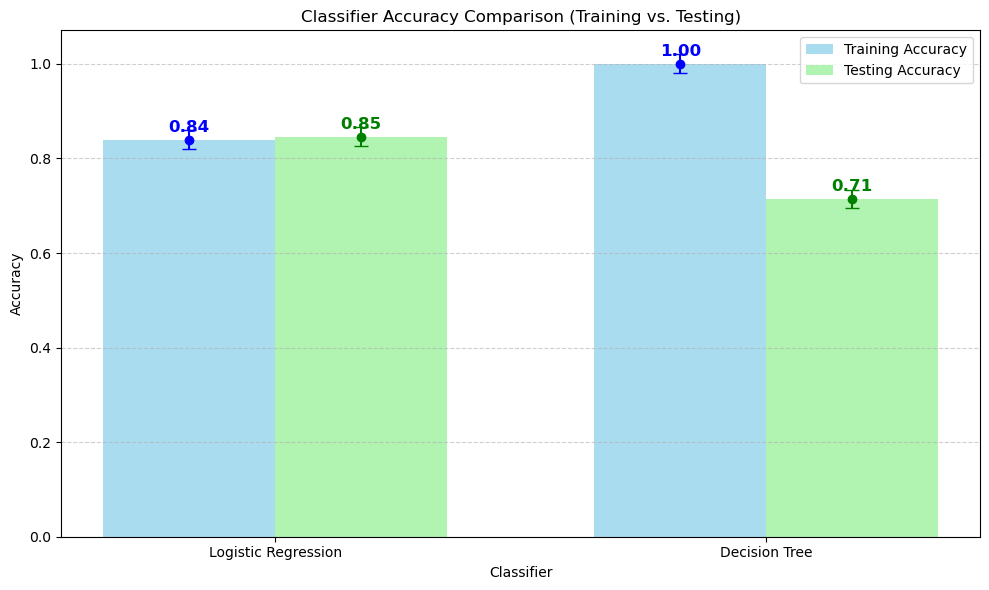

In [28]:
# Accuracy scores for training and testing data
train_accuracies = [model.score(x_train, y_train), decisiontree.score(x_train, y_train)]
test_accuracies = [accuracy1, accuracy2]

# Classifiers
classifiers = ['Logistic Regression', 'Decision Tree']
bar_width = 0.35
index = np.arange(len(classifiers))

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training accuracies
train_bars = ax.bar(index, train_accuracies, bar_width, label='Training Accuracy', color='skyblue', alpha=0.7)

# Plot testing accuracies
test_bars = ax.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy', color='lightgreen', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Accuracy Comparison (Training vs. Testing)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classifiers)
ax.legend()

# Annotate the bars with accuracy values
for i, v in enumerate(train_accuracies):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='blue')

for i, v in enumerate(test_accuracies):
    ax.text(i + bar_width, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='green')

# Add error bars to show the variation
ax.errorbar(index, train_accuracies, yerr=0.02, fmt='o', color='blue', capsize=5, label='Train ± Std Dev')
ax.errorbar(index + bar_width, test_accuracies, yerr=0.02, fmt='o', color='green', capsize=5, label='Test ± Std Dev')

# Add a grid for reference
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


# Data Visualization

Confusion Matrix:
 [[31 10]
 [16 34]]


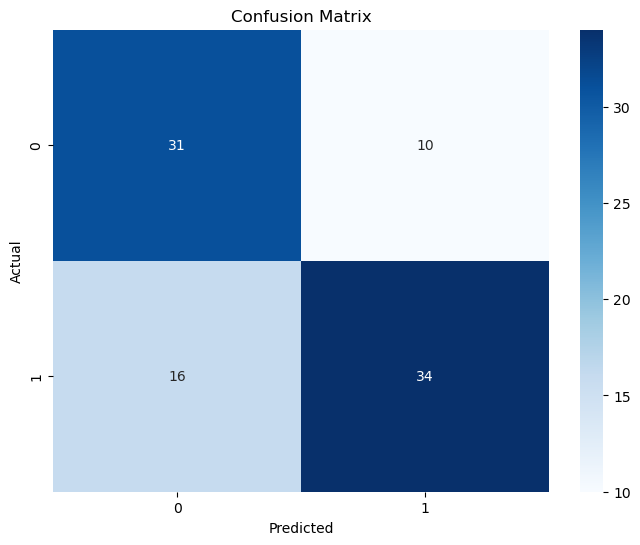

In [29]:
#  Confusion matrix 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
# Classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.70        41
           1       0.77      0.68      0.72        50

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



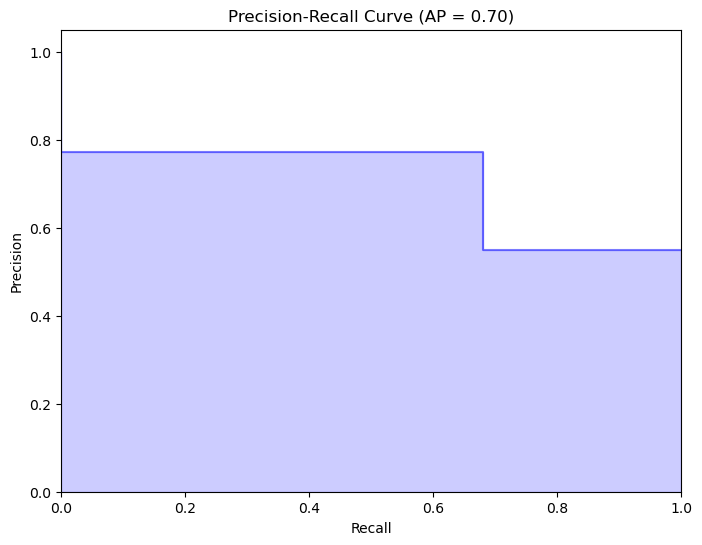

In [31]:
# Precision-Recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.show()

**Age Distribution Histogram:**

- This histogram shows the distribution of ages in the dataset. It provides an overview of the age range of individuals in the dataset, with a kernel density estimate overlaid for a smoother representation.

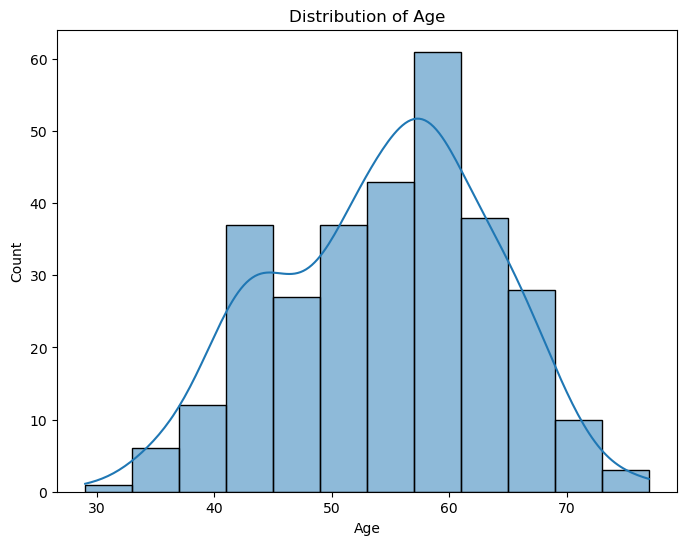

In [32]:
plt.figure(figsize=(8, 6)) 
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Gender Distribution Countplot:**

  - This countplot displays the distribution of gender (sex) in the dataset. It helps visualize the gender balance among individuals in the study.


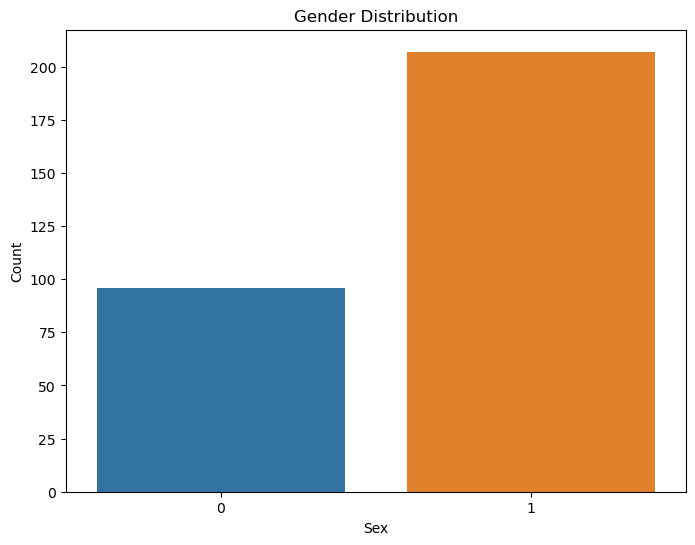

In [33]:
# Create a countplot for 'sex'
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

**Chest Pain Type Distribution Bar Plot:**

   - This bar plot illustrates the distribution of different types of chest pain (cp) reported by individuals. It helps to understand the prevalence of various chest pain types in the dataset.



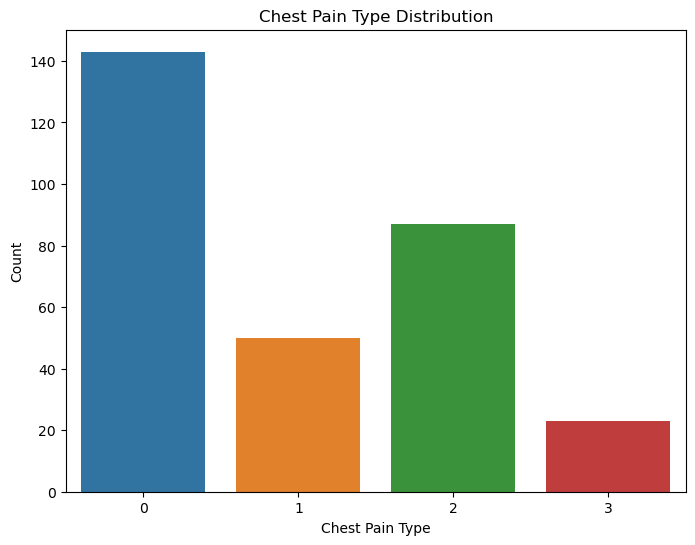

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', data=df)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

**Pairplot of Numerical Variables with Target Hue:**
   -  This pairplot provides a visual exploration of relationships between numerical variables (age, trestbps, chol, thalach, oldpeak) in the dataset. The hue is set to the 'target' variable, allowing you to see how these variables vary concerning the presence or absence of heart disease.


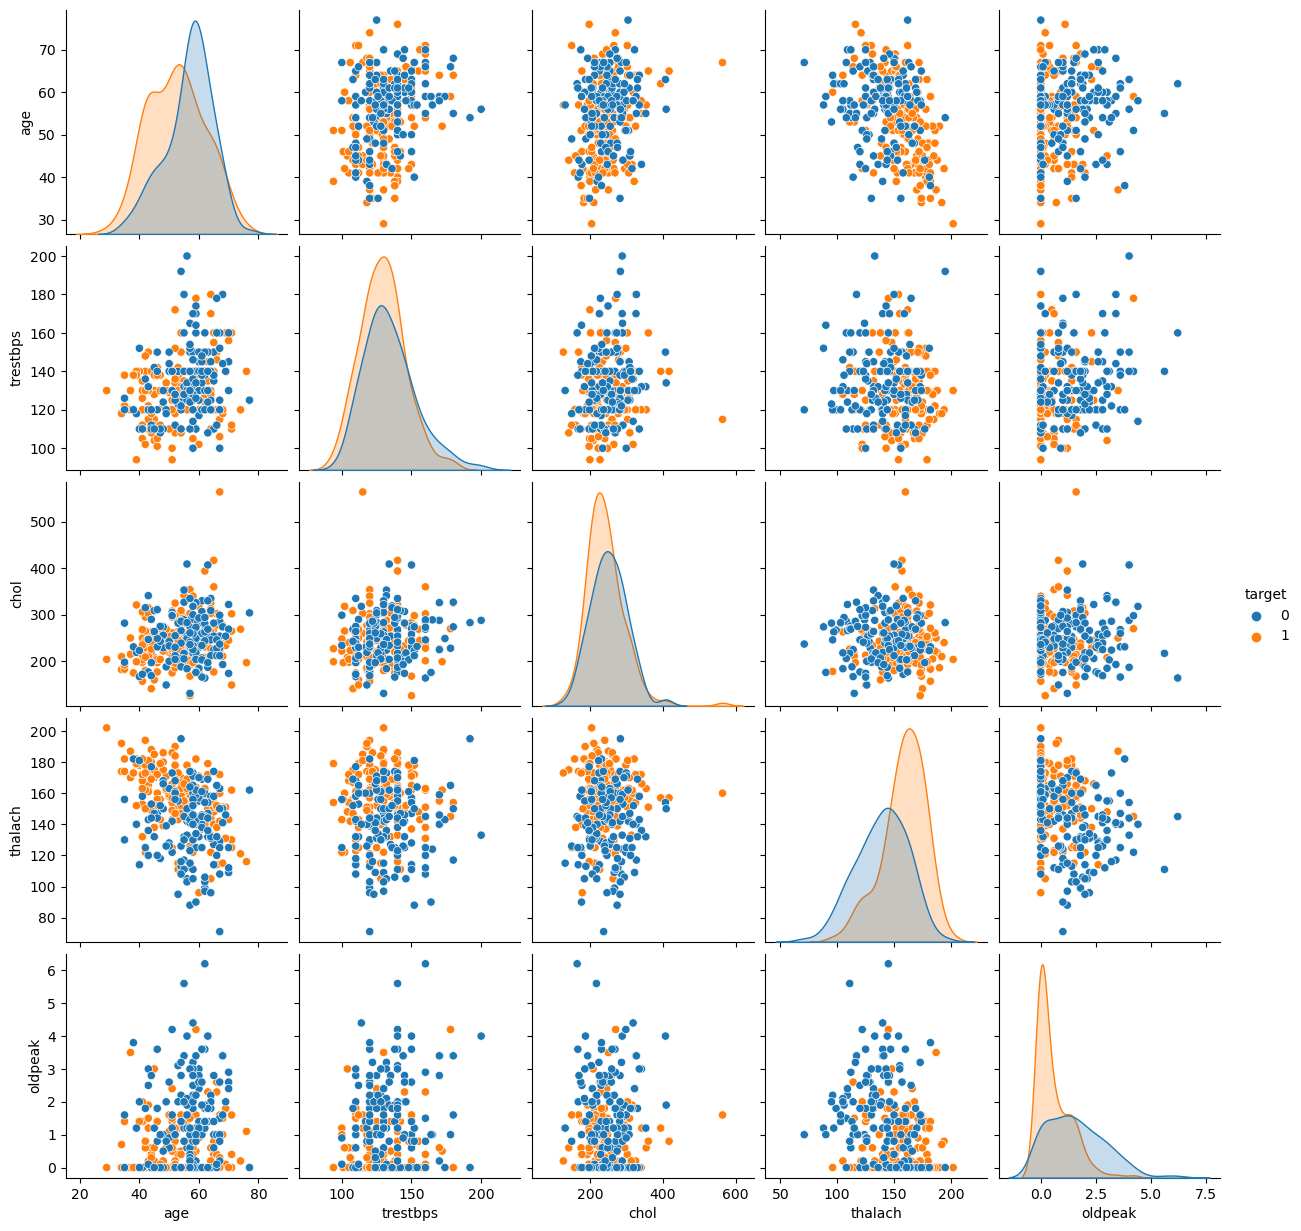

In [35]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')
plt.show()


**Correlation Heatmap:**
   - This heatmap displays the correlation between all pairs of numerical variables in the dataset. It helps identify potential relationships between variables, with warmer colors indicating stronger positive correlations and cooler colors indicating negative correlations. This can be useful for feature selection and understanding variable relationships.







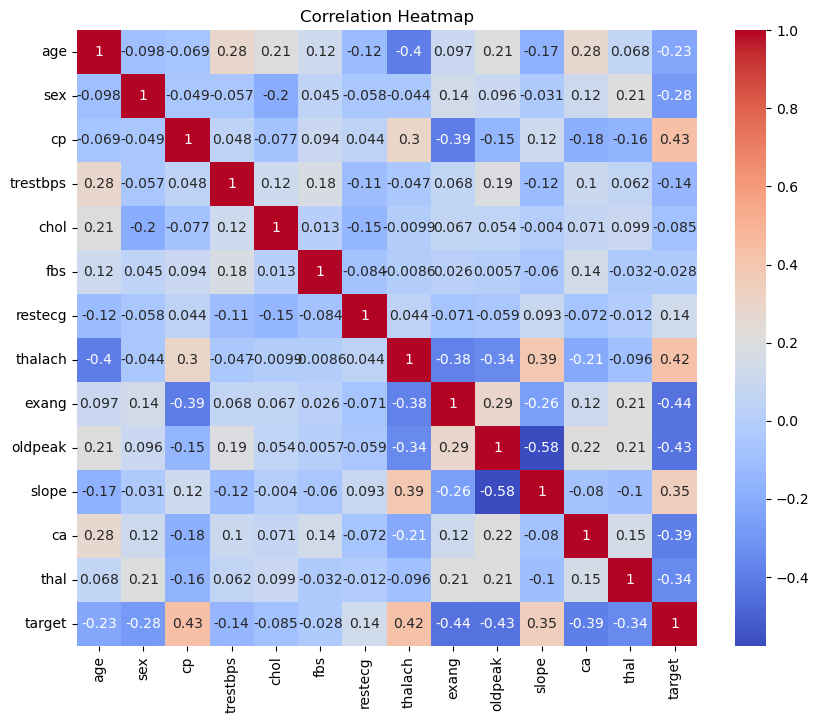

In [36]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()